In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import dtale

In [33]:
# Create a function to plot unique value counts
def plot_unique_value_counts(df):
    unique_counts = []
    column_names = []

    for column in df.columns:
        unique_count = df[column].nunique()
        unique_counts.append(unique_count)
        column_names.append(column)

    plt.figure(figsize=(10, 6))
    plt.bar(column_names, unique_counts)
    plt.ylabel("Count")
    plt.title("Unique Value Counts in Columns")
    plt.show()

In [34]:
file_path = "scenarios.csv"

df = pd.read_csv(file_path)
df = df.fillna("None")
df

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch
0,VGG,Yes,Full,0.0010,1,SGD,0.2082,0.5488,0.5149,2.63000,67,50
1,VGG,Yes,½,0.0010,1,SGD,0.9952,0.9942,0.9921,0.04196,62,30
2,VGG,Yes,None,0.0010,1,SGD,0.9871,0.9913,0.9921,0.02506,50,13
3,VGG,Yes,Full,0.0001,1,SGD,0.0678,0.1169,0.1089,2.95050,66,50
4,VGG,Yes,½,0.0001,1,SGD,0.9698,0.9836,0.9762,0.07300,107,50
...,...,...,...,...,...,...,...,...,...,...,...,...
139,Xception,No,½,0.0010,2,Adam,0.9874,0.9758,0.9455,0.21330,7,12
140,Xception,No,None,0.0010,2,Adam,0.9938,1.0000,0.9802,0.12780,15,14
141,Xception,No,Full,0.0001,2,Adam,0.8029,0.8213,0.7525,0.87310,16,50
142,Xception,No,½,0.0001,2,Adam,0.9988,0.9662,0.9307,0.20680,8,14


In [35]:
df["Learning Rate"] = df["Learning Rate"].astype(str)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          144 non-null    object 
 1   Augmentasi     144 non-null    object 
 2   Freeze         144 non-null    object 
 3   Learning Rate  144 non-null    object 
 4   Layer          144 non-null    int64  
 5   Optimizer      144 non-null    object 
 6   Result Train   144 non-null    float64
 7   Validation     144 non-null    float64
 8   Test           144 non-null    float64
 9   Test Loss      144 non-null    float64
 10  Time (min)     144 non-null    int64  
 11  Epoch          144 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 13.6+ KB


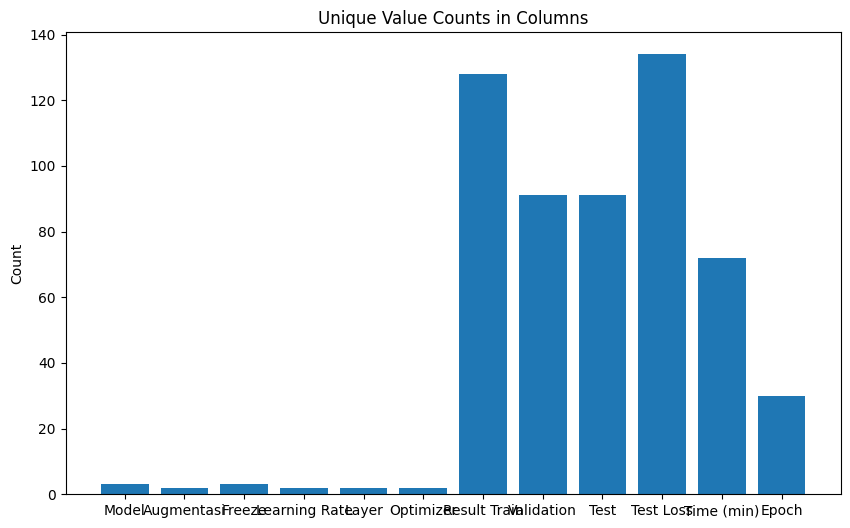

In [37]:
plot_unique_value_counts(df)

In [38]:
d = dtale.show(df)
d._main_url

'http://SESAR:40000/dtale/main/1'

In [39]:
top_10_df = (
    df.groupby("Model").apply(lambda x: x.nlargest(10, "Test")).reset_index(drop=True)
)
top_10_df

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch
0,Inception,Yes,None,0.0001,1,Adam,0.9982,0.9961,1.0000,0.002035,38,14
1,Inception,No,None,0.0001,1,Adam,0.9991,0.9952,1.0000,0.004126,11,19
2,Inception,Yes,None,0.001,1,Adam,0.9956,1.0000,0.9960,0.007950,74,27
3,Inception,Yes,None,0.001,2,Adam,0.9949,0.9942,0.9960,0.009453,52,19
4,Inception,Yes,None,0.001,1,SGD,0.9990,0.9903,0.9921,0.026240,65,23
5,Inception,Yes,None,0.001,2,SGD,0.9996,0.9961,0.9901,0.031170,79,31
6,Inception,No,None,0.001,1,SGD,0.9988,0.9952,0.9901,0.051310,28,50
7,Inception,No,None,0.001,1,Adam,0.9882,0.9952,0.9901,0.047590,9,16
8,Inception,No,½,0.001,2,Adam,0.9962,0.9903,0.9901,0.034430,5,17
9,Inception,No,None,0.0001,2,Adam,0.9941,1.0000,0.9901,0.035890,8,14


In [40]:
top_10_d = dtale.show(top_10_df)
top_10_d._main_url

'http://SESAR:40000/dtale/main/2'

In [41]:
top_10_df.to_csv("top_10.csv", index=False)

In [42]:
top_20_df = (
    df.groupby("Model").apply(lambda x: x.nlargest(20, "Test")).reset_index(drop=True)
)
top_20_df

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch
0,Inception,Yes,None,0.0001,1,Adam,0.9982,0.9961,1.0000,0.002035,38,14
1,Inception,No,None,0.0001,1,Adam,0.9991,0.9952,1.0000,0.004126,11,19
2,Inception,Yes,None,0.001,1,Adam,0.9956,1.0000,0.9960,0.007950,74,27
3,Inception,Yes,None,0.001,2,Adam,0.9949,0.9942,0.9960,0.009453,52,19
4,Inception,Yes,None,0.001,1,SGD,0.9990,0.9903,0.9921,0.026240,65,23
5,Inception,Yes,None,0.001,2,SGD,0.9996,0.9961,0.9901,0.031170,79,31
6,Inception,No,None,0.001,1,SGD,0.9988,0.9952,0.9901,0.051310,28,50
7,Inception,No,None,0.001,1,Adam,0.9882,0.9952,0.9901,0.047590,9,16
8,Inception,No,½,0.001,2,Adam,0.9962,0.9903,0.9901,0.034430,5,17
9,Inception,No,None,0.0001,2,Adam,0.9941,1.0000,0.9901,0.035890,8,14


In [43]:
top_20_d = dtale.show(top_20_df)
top_20_d._main_url

'http://SESAR:40000/dtale/main/3'

In [44]:
top_30_df = (
    df.groupby("Model").apply(lambda x: x.nlargest(30, "Test")).reset_index(drop=True)
)
top_30_df

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch
0,Inception,Yes,None,0.0001,1,Adam,0.9982,0.9961,1.0000,0.002035,38,14
1,Inception,No,None,0.0001,1,Adam,0.9991,0.9952,1.0000,0.004126,11,19
2,Inception,Yes,None,0.001,1,Adam,0.9956,1.0000,0.9960,0.007950,74,27
3,Inception,Yes,None,0.001,2,Adam,0.9949,0.9942,0.9960,0.009453,52,19
4,Inception,Yes,None,0.001,1,SGD,0.9990,0.9903,0.9921,0.026240,65,23
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Xception,No,½,0.001,1,SGD,0.8490,0.8696,0.8366,0.716600,28,50
86,Xception,Yes,None,0.0001,2,SGD,0.7651,0.8290,0.8208,1.053200,229,50
87,Xception,Yes,Full,0.0001,1,Adam,0.7782,0.8531,0.8000,0.782200,90,50
88,Xception,Yes,½,0.0001,1,SGD,0.7532,0.8261,0.7871,1.052000,142,50


In [45]:
top_30_d = dtale.show(top_30_df)
top_30_d._main_url

'http://SESAR:40000/dtale/main/4'

In [46]:
top_3s_freeze = (
    df.groupby(["Model", "Freeze"])
    .apply(lambda x: x.nlargest(3, "Test"))
    .reset_index(drop=True)
)
top_3s_freeze

,Model,Augmentasi,Freeze,Learning Rate,Layer,Optimizer,Result Train,Validation,Test,Test Loss,Time (min),Epoch
0,Inception,Yes,Full,0.001,2,Adam,0.6760,0.7826,0.7139,0.913700,46,39
1,Inception,Yes,Full,0.0001,2,Adam,0.6966,0.7797,0.7119,0.920900,60,50
2,Inception,No,Full,0.001,2,Adam,0.6143,0.7343,0.7079,1.012000,9,31
3,Inception,Yes,None,0.0001,1,Adam,0.9982,0.9961,1.0000,0.002035,38,14
4,Inception,No,None,0.0001,1,Adam,0.9991,0.9952,1.0000,0.004126,11,19
5,Inception,Yes,None,0.001,1,Adam,0.9956,1.0000,0.9960,0.007950,74,27
6,Inception,No,½,0.001,2,Adam,0.9962,0.9903,0.9901,0.034430,5,17
7,Inception,Yes,½,0.001,1,Adam,0.9942,0.9903,0.9891,0.040080,26,14
8,Inception,No,½,0.001,1,Adam,0.9903,0.9855,0.9851,0.049750,3,11
9,VGG,No,Full,0.001,2,Adam,0.7333,0.9179,0.9109,0.448000,12,43


In [47]:
top_3s_d = dtale.show(top_3s_freeze)
top_3s_d._main_url

'http://SESAR:40000/dtale/main/5'

In [48]:
top_3s_freeze.to_csv("top_3s_freeze.csv", index=False)

In [49]:
# PREPROCESS THE DATAFRAME TO SEE THE CORRELATION MATRIX FOR EACH CONFIGS

df_preprocessed = df.copy()

columns_to_encode = ["Augmentasi", "Freeze", "Learning Rate", "Layer", "Optimizer"]

one_hot = pd.get_dummies(df_preprocessed[columns_to_encode])
df_preprocessed = df_preprocessed.drop(columns_to_encode, axis=1)
df_preprocessed = df_preprocessed.join(one_hot)

df_preprocessed = df_preprocessed.drop(["Model"], axis=1)

df_preprocessed

,Result Train,Validation,Test,Test Loss,Time (min),Epoch,Layer,Augmentasi_No,Augmentasi_Yes,Freeze_Full,Freeze_None,Freeze_½,Learning Rate_0.0001,Learning Rate_0.001,Optimizer_Adam,Optimizer_SGD
0,0.2082,0.5488,0.5149,2.63000,67,50,1,False,True,True,False,False,False,True,False,True
1,0.9952,0.9942,0.9921,0.04196,62,30,1,False,True,False,False,True,False,True,False,True
2,0.9871,0.9913,0.9921,0.02506,50,13,1,False,True,False,True,False,False,True,False,True
3,0.0678,0.1169,0.1089,2.95050,66,50,1,False,True,True,False,False,True,False,False,True
4,0.9698,0.9836,0.9762,0.07300,107,50,1,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.9874,0.9758,0.9455,0.21330,7,12,2,True,False,False,False,True,False,True,True,False
140,0.9938,1.0000,0.9802,0.12780,15,14,2,True,False,False,True,False,False,True,True,False
141,0.8029,0.8213,0.7525,0.87310,16,50,2,True,False,True,False,False,True,False,True,False
142,0.9988,0.9662,0.9307,0.20680,8,14,2,True,False,False,False,True,True,False,True,False


c:\Users\sesar\Documents\_PROJECTS\k-thesis\venv\Lib\site-packages\dython\nominal.py:224: RuntimeWarning:

Rounded U = -2.0211370946362218e-16 to 0.0. This is probably due to floating point precision issues.



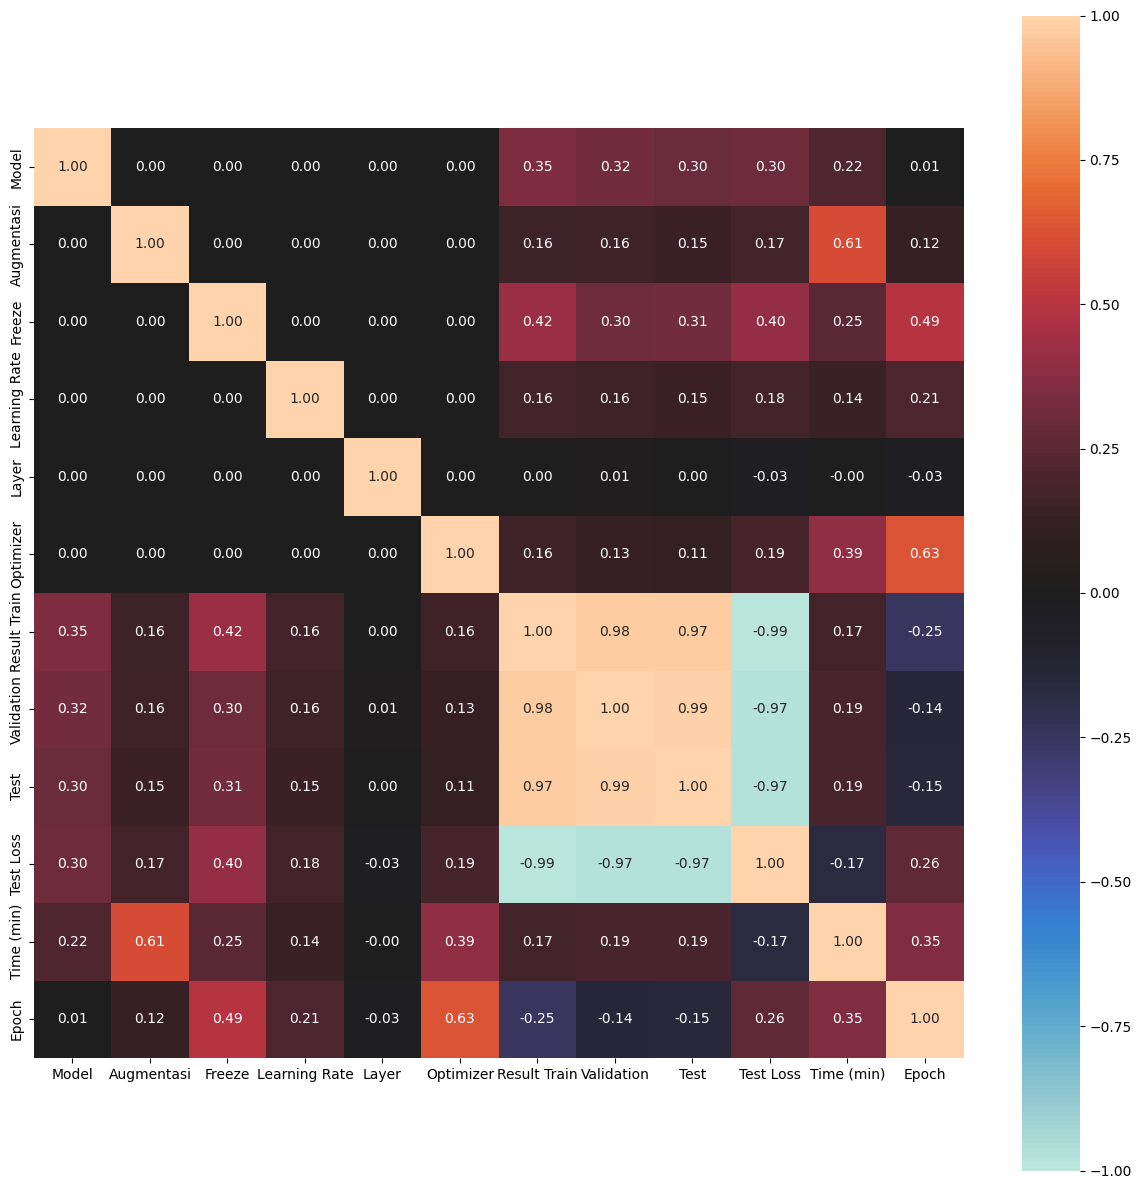

{'corr':                   Model  Augmentasi    Freeze  Learning Rate     Layer  \
 Model          1.000000    0.000000  0.000000       0.000000  0.000000   
 Augmentasi     0.000000    1.000000  0.000000       0.000000  0.000000   
 Freeze         0.000000    0.000000  1.000000       0.000000  0.000000   
 Learning Rate  0.000000    0.000000  0.000000       1.000000  0.000000   
 Layer          0.000000    0.000000  0.000000       0.000000  1.000000   
 Optimizer      0.000000    0.000000  0.000000       0.000000  0.000000   
 Result Train   0.345552    0.155004  0.416637       0.164266  0.000118   
 Validation     0.317536    0.156569  0.298480       0.159281  0.011986   
 Test           0.295826    0.148217  0.312895       0.147306  0.000594   
 Test Loss      0.300092    0.171851  0.398454       0.176579 -0.027869   
 Time (min)     0.217042    0.605562  0.246689       0.136289 -0.000607   
 Epoch          0.006875    0.120322  0.494212       0.208640 -0.028764   
 
               

In [50]:
from dython.nominal import associations

associations(df, nom_nom_assoc="theil", figsize=(15, 15))

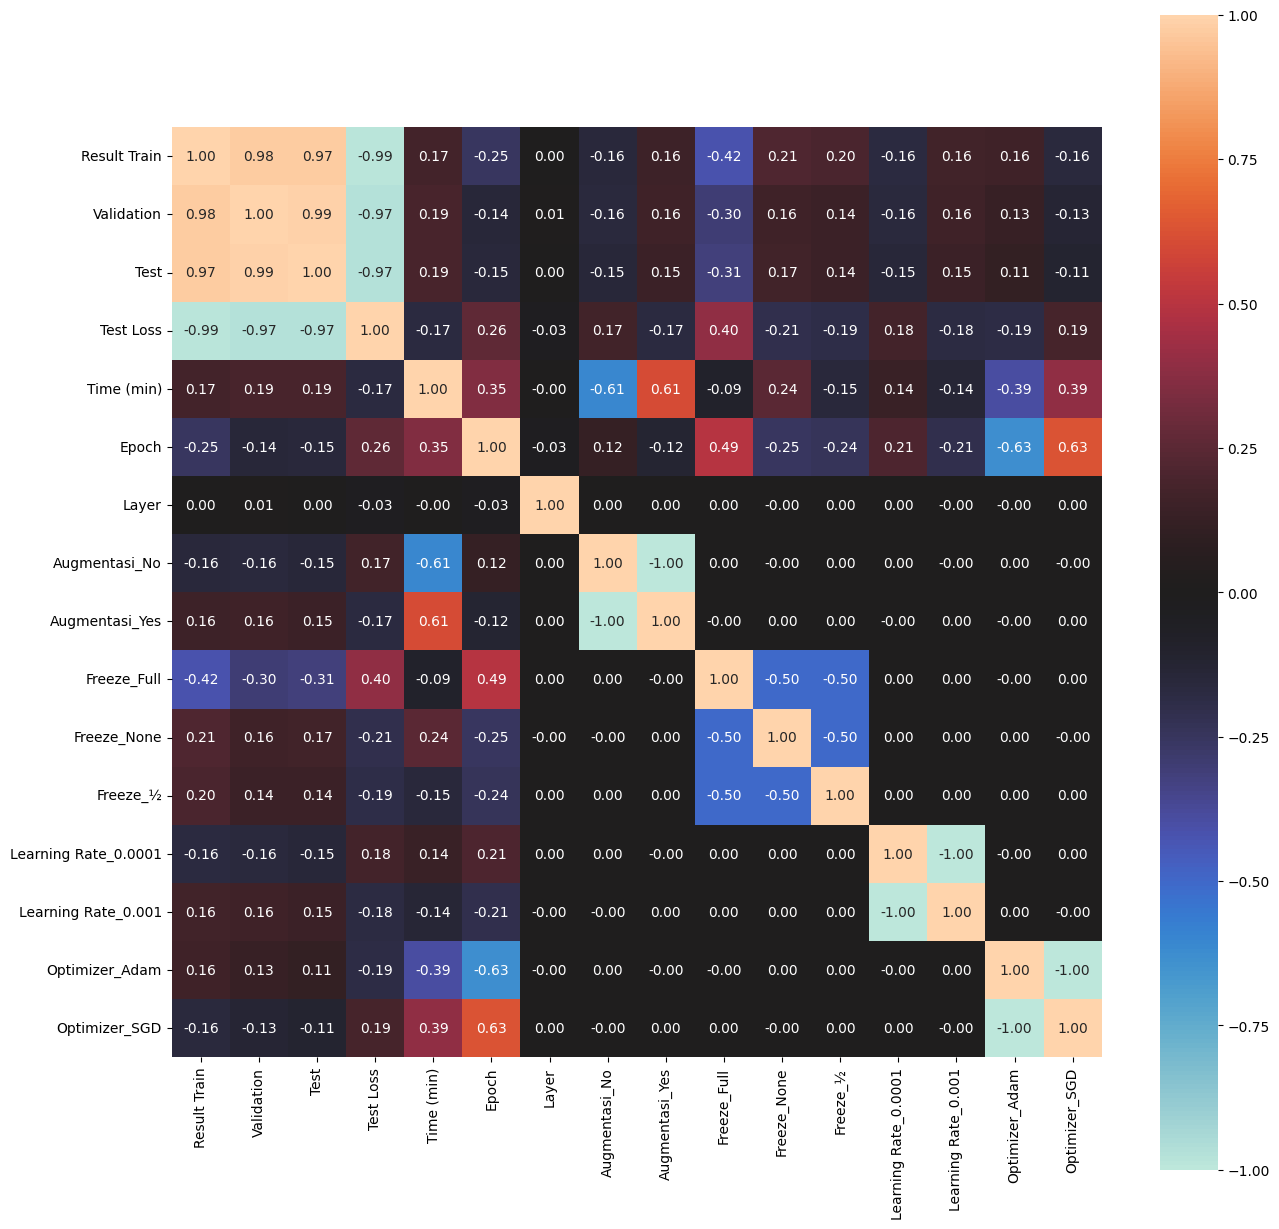

{'corr':                       Result Train  Validation      Test  Test Loss  \
 Result Train              1.000000    0.975042  0.970293  -0.991756   
 Validation                0.975042    1.000000  0.987026  -0.971192   
 Test                      0.970293    0.987026  1.000000  -0.970237   
 Test Loss                -0.991756   -0.971192 -0.970237   1.000000   
 Time (min)                0.173879    0.192116  0.189141  -0.165615   
 Epoch                    -0.252955   -0.142249 -0.149722   0.264804   
 Layer                     0.000118    0.011986  0.000594  -0.027869   
 Augmentasi_No            -0.155004   -0.156569 -0.148217   0.171851   
 Augmentasi_Yes            0.155004    0.156569  0.148217  -0.171851   
 Freeze_Full              -0.416565   -0.298348 -0.312526   0.398234   
 Freeze_None               0.214982    0.156887  0.169427  -0.210577   
 Freeze_½                  0.201583    0.141461  0.143099  -0.187657   
 Learning Rate_0.0001     -0.164266   -0.159281 -0.14730

In [51]:
from dython.nominal import associations

associations(df_preprocessed, nom_nom_assoc="theil", figsize=(15, 15))

In [52]:
preprocessed_d = dtale.show(df_preprocessed)
preprocessed_d._main_url

'http://SESAR:40000/dtale/main/6'